In [1]:
import urllib.request
import json
import dml
import prov.model
import datetime 
import uuid
import sys
from multiprocessing import Process
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
client = dml.pymongo.MongoClient()
repo = client.repo
repo.authenticate('minteng_tigerlei_zhidou', 'minteng_tigerlei_zhidou')

True

In [3]:
districtNum = repo['minteng_tigerlei_zhidou.box_count'].count()
crimeVector = np.zeros([6, districtNum, 12])

In [4]:
for date, dNum in zip(repo['minteng_tigerlei_zhidou.box_count'].find(), range(districtNum)):
    area = repo['minteng_tigerlei_zhidou.crime'].find({'location':{'$geoWithin':{ '$box': date['box']}}})
    for event in area:
        crimeVector[event['year'] - 2012][dNum][event['month'] - 1] += 1

In [5]:
corrfP = [ [stats.pearsonr(crimeVector[i][k], crimeVector[i + 1][k]) for k in range(districtNum)] for i in range(5) ]

/Users/douzhi/Software/anaconda3/envs/cs505/lib/python3.5/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [6]:
np.set_printoptions(suppress=True)

In [7]:
print("                    corrf             p-value      ")
for i in range(5):
    for block, dnum in zip(corrfP[i], range(districtNum)):
        if (abs(block[0]) > 0.7):
            print(str(i + 12) + ' - block {}:  '.format(dnum) + str(block[0]) + "   " + str(block[1]))

                    corrf             p-value      
12 - block 4:  -0.74928968171   0.00502891500175
12 - block 33:  -0.705835443137   0.0103165129684
13 - block 10:  0.802538043025   0.00167927443055
13 - block 13:  0.800156400433   0.00177538427931
13 - block 15:  0.786581049099   0.00240630594846
13 - block 17:  0.822155109151   0.00103084126636
13 - block 22:  0.96859657744   2.28174974341e-07
13 - block 26:  0.858228667227   0.000353765260006
13 - block 27:  0.836472540464   0.000695048480985
14 - block 7:  0.750522789446   0.00491759439861
14 - block 15:  0.706872802065   0.0101555953946
14 - block 26:  0.736998561614   0.00624536925689
14 - block 27:  0.735134468067   0.00644758659544


The figure below shows the number of crime in block 27 in 2013, 2014, 2015, 2015

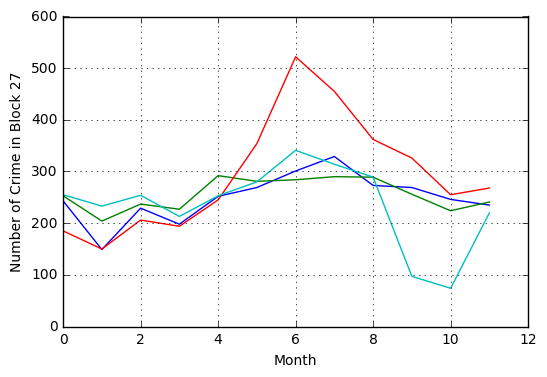

In [26]:
plt.xlabel('Month',size=10)
plt.ylabel('Number of Crime in Block 27',size=10)
plt.grid(True)

plt.plot(range(0,12), crimeVector[1:5, 27].transpose())
# plt.savefig('Block27.png')
plt.show()

In [9]:
xs = np.array(range(12))

In [10]:
xs = np.concatenate([xs, xs])
xs = np.concatenate([xs, xs])

In [11]:
temp = crimeVector[1:5,27]

In [13]:
temp = crimeVector[1:5,27]
y =temp[0]
for i in range(1, 4):
    y = np.concatenate([y, temp[i]])

In [16]:
p = np.poly1d(np.polyfit(xs, y, 3))

The figure below shows trend of the number of crime in block 27

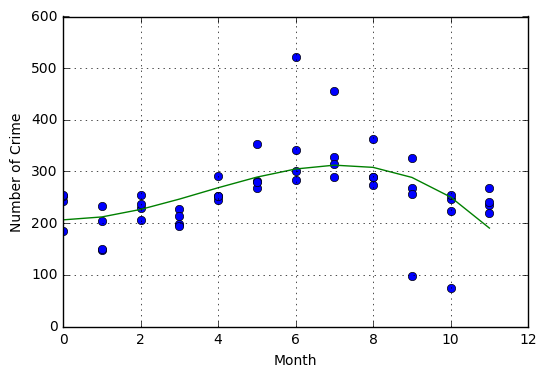

In [17]:
xp = np.array(range(12))
plt.xlabel('Month',size=10)
plt.ylabel('Number of Crime',size=10)
plt.grid(True)
_ = plt.plot(xs, y, 'o', xp, p(xp), '-')
plt.show()

# plt.savefig('fitting.png')